## 1. Du Bois, cross tabulations, and data exploration

"Many of the examples in the first 3 chapters are quite old, drawn from studies conducted as far back as the 1960s. This is because at that time tabular analysis was the 'state of the art'." Treiman, pp. 1

## All knowledge requires comparison

In statistics, what are the 3 fundamental levels measurement for comparison?

Your answers here:
1.  nominal
2.  ordinal
3.  interval/ratio

## One descriptive form of comparison is to present univariate distributions

### Example 1: What level of measurement is used for the following Du Bois comparison?
Add your answer here: Nominal - ordinal

<img src="https://miro.medium.com/max/2652/1*ci_qRah4EQqsW31hDqSCLw.png" width="400" align="left">

### Example 2: Fewer illustrations of univariate distributions of interval ratio data
What are examples statistics and plots we use for univariate distributions?
1. Histogram - continuous frequency distribution
2. Box plot - plot statistics such as interquartile range, median, percentiles in a distribution
3. Mean and standard deviation - average and variance, mode

## Download Charlie's data on for-profit colleges to your directory using the code below

In [2]:
copy "https://raw.githubusercontent.com/charlieeatonphd/agilepredators/master/agilepredatorsdata20191116.csv" agilepredatorsdata20191116.csv

## Now read Charlie's data into Stata

In [3]:
import delimited using "agilepredatorsdata20191116.csv", clear
keep if year==2014


(52 vars, 205,262 obs)

(197,685 observations deleted)


### Check out the names of all the variables

In [4]:
ds, varwidth(29)

unitid                    idx_gr                    online                    chain                     grad_rate_150_p_w         pctchrtgrbkaat_w          pct4yrchrtgrbkaat_w       poacqu                    peswitcherall
year                      selective                 total_enrollment          investevent               grad_rate_150_p2yr_w      pctchrtgrwhitt_w          pct4yrchrtgrhispt_w       dist_pell_s               peswitchsystemall
iclevel                   systemid                  grtotltchrt4yr            pe_ind                    grad_rate_150_p4yr_w      pctchrtgrhispt_w          pct4yrchrtgrwhitt_w       dist_black_share_w        poswitcherall
idx_ef                    systemnm                  grtotltchrt2yr            po_ind                    all_under_w               pct2yrchrtgrbkaat_w       state_n                   dist_white_share_w        poswitchsystemall
idx_f                     ipo                       grtotltallgradchrt        inst_name_new             

## Check out the summary stats for college-level tuition rates, add a label

What level of measurement does this var use?

In [9]:
list inst_name_new tuitionall_c_w if _n<6


      +------------------------------------------------+
      |                       inst_name_new   tuitio~w |
      |------------------------------------------------|
   1. |            ALABAMA A & M UNIVERSITY   5637.231 |
   2. | UNIVERSITY OF ALABAMA AT BIRMINGHAM   7264.286 |
   3. |       SOUTHERN CHRISTIAN UNIVERSITY   6955.811 |
   4. | UNIVERSITY OF ALABAMA IN HUNTSVILLE    9266.35 |
   5. |            ALABAMA STATE UNIVERSITY   6992.102 |
      +------------------------------------------------+


In [8]:
sum tuitionall_c_w grad_rate_150_p_w, detail
*label var tuitionall_c_w "college-level annual tuition rate"


              college-level annual tuition rate
-------------------------------------------------------------
      Percentiles      Smallest
 1%     977.8459        205.615
 5%     1984.926        205.615
10%     2897.246        205.615       Obs               7,209
25%     6616.085        205.615       Sum of Wgt.       7,209

50%     13089.02                      Mean           13730.04
                        Largest       Std. Dev.      9019.011
75%     17637.52       38608.27
90%      27107.5       38608.27       Variance       8.13e+07
95%     33147.96       38608.27       Skewness        .898302
99%     38608.27       38608.27       Kurtosis       3.584447

                      grad_rate_150_p_w
-------------------------------------------------------------
no observations


### Summarize again with more detail

In [ ]:
sum tuitionall_c_w
label var tuitionall_c_w "college-level annual tuition rate"

. 
. 
## These stats, including pctiles, are a wall of inpenetrable numbers. Lets try histograms

(bin=38, start=205.61501, width=1010.5962)


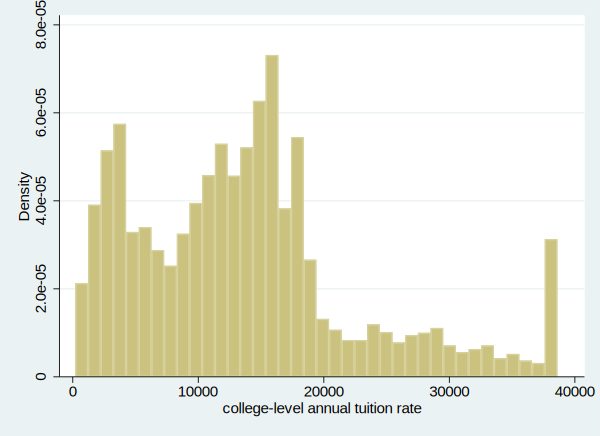

In [10]:
histogram tuitionall_c_w

## How about Boxplots?

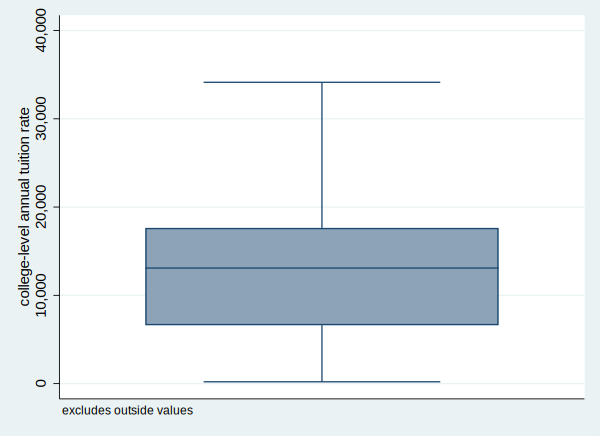

In [11]:
graph box tuitionall_c_w, nooutsides

# Going back to Du Bois - he uses a bar graph for his nominal data on "race amalgamation", instead of a table

## Let's compare the efficacy of a table vs a bar graph for the distribution of college "ownership" forms in just 2017

# First the table:

In [12]:
label var owner_pe "ownership form" // since var label was missing
codebook owner_pe
tab owner_pe




---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
owner_pe                                                                                                                                                                                                                                         ownership form
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

                  type:  string (str15)

         unique values:  6                        missing "":  0/7,577

            tabulation:  Freq.  Value
                         1,302  "Community"
                         1,920  "

# Now the bar graph

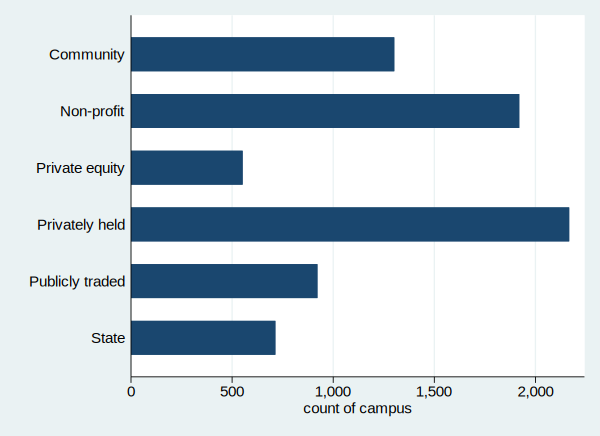

In [13]:
gen campus=1
graph hbar (count) campus, over(owner_pe)

# Maybe a percentage table is more informative?

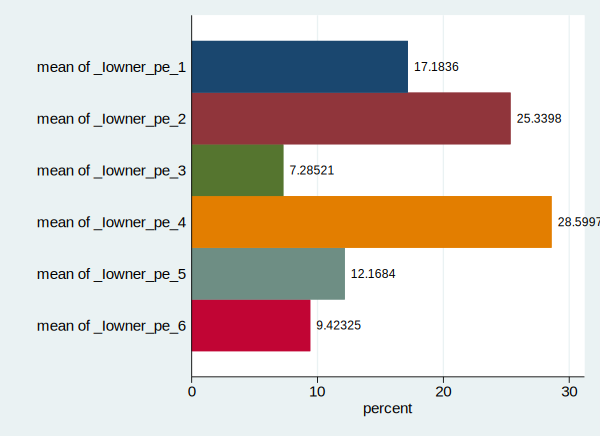

In [14]:
xi i.owner_pe, noomit // create dummy vars for ownership
graph hbar _Iowner_pe*, label percentages legend(off) blabel(bar) showyvars

# Barf, the bar labels are confusing and sorting bars would help

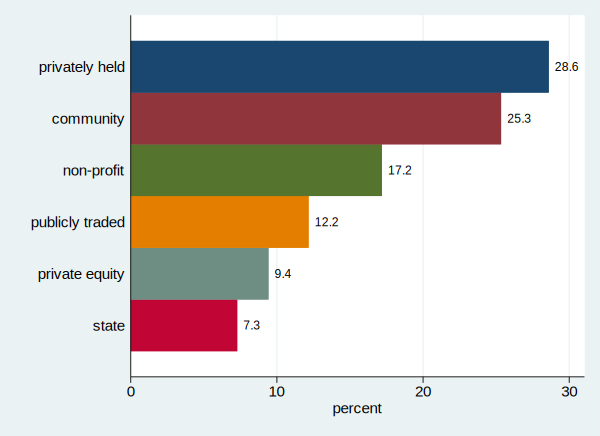

In [15]:
xi i.owner_pe, noomit // create dummy vars for ownership

graph hbar _Iowner_pe_4 _Iowner_pe_2 _Iowner_pe_1 _Iowner_pe_5 _Iowner_pe_6 _Iowner_pe_3  ///
, label percentages legend(off) blabel(bar, format(%9.1f)) showyvars ///
yvaroptions(relabel(1 "privately held" 2 "community" 3 "non-profit" 4 "publicly traded" 5 "private equity" 6 "state"))

# And lets check out a stacked option like Du Bois'

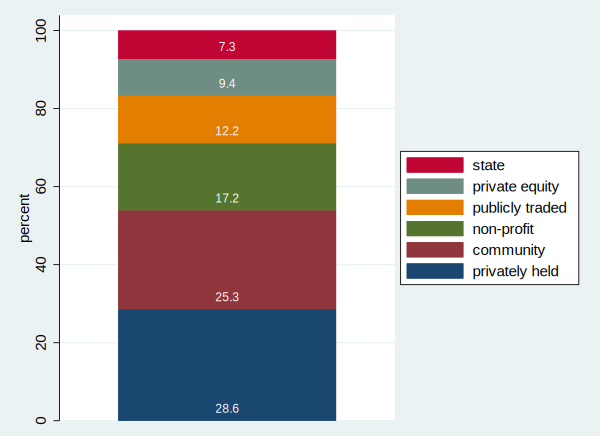

In [16]:
graph bar _Iowner_pe_4 _Iowner_pe_2 _Iowner_pe_1 _Iowner_pe_5 _Iowner_pe_6 _Iowner_pe_3  ///
, label percentages legend(position(3) cols(1) order(6 5 4 3 2 1)) blabel(bar, format(%9.1f) position(base) color(white)) ///
yvaroptions(relabel(1 "privately held" 2 "community" 3 "non-profit" 4 "publicly traded" 5 "private equity" 6 "state")) stack

# Now its your turn!

## Let's start by describing and plotting the distribution of an interval ratio variable

## 1. Write code to generate summary statistics for college level student debt per borrower using the variable ***loan_amount_borrower_c_w***

In [6]:
// Your code here

## 2. now write code to generate a histogram

## 3. and now edit the code below to generate a boxplot

In [ ]:
*graph __________     ___________, nooutsides

# Now let's describe and visualize the distribution of colleges across nominal categories

# 1. First edit the code below to simplify the ownership categories by combining "state" and "community" into "public"
# and combining "publicly trade", "private equity", and "privately held" into "for-profit"

In [22]:
gen control=1 if owner_pe=="State" | owner_pe=="Community"
replace control=  if owner_pe=="Non-profit"
replace control= if owner_pe=="Publicly traded" | owner_pe=="Private equity" | owner_pe=="Privately held"


variable control already defined


r(110);
r(110);


### 2. Now label the data and create a table of the distribution

In [20]:
label define control 1 "public" 2 "non-profit" 3 "for-profit"
label values control control
*[insert command here] contrl

# The table is kind of boring, so edit the code below to create a bar graph instead

In [23]:
xi i.control, noomit // create dummy vars for control

_________ ________ Icontrol_1 ________   __________ ///
, label percentages legend(off) blabel(bar, format(%9.1f)) showyvars ///
yvaroptions(relabel(1 "public" 2 "non-profit" 3 "for-profit"))



command _________ is unrecognized


r(199);
r(199);


# .
# .
# Far out!
## But many sociological interests are **RELATIONAL**
## It's relationships that put the **CROSS** in **CROSSTABS**
## In Treiman chapter 1 we use crosstabular **tables** for frequency distributions across **at least 2 NOMINAL variables**
## Du Bois also presents bivariate cross tabs for nominal frequency distributions, **but GRAPHICALLY**

<img src="https://cdn.loc.gov/service/pnp/ppmsca/33800/33889v.jpg" width="600" align="left">

# Here's what that would look like as a table or a bar graph.
# Which do you like best?




















----------------------------
              |     race    
   occupation | black  white
--------------+-------------
           ag |    62     64
     domestic |    28    5.5
manufacturing |     5   13.5
        trade |   4.5     13
----------------------------


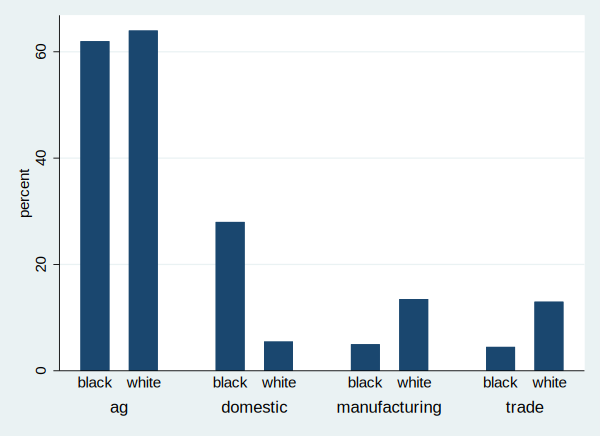

In [17]:
preserve
quietly drop if _n>0
quietly set obs `=_N+8'
quietly gen occupation="ag"
quietly replace occupation="domestic" if _n<7
quietly replace occupation="manufacturing" if _n<5
quietly replace occupation="trade" if _n<3
quietly gen race="black" if _n==1 | _n==3 | _n==5 | _n==8
quietly replace race="white" if race==""
quietly gen percent=62 if race=="black" & occupation=="ag"
quietly replace percent=28 if race=="black" & occupation=="domestic"
quietly replace percent=5 if race=="black" & occupation=="manufacturing"
quietly replace percent=4.5 if race=="black" & occupation=="trade"
quietly replace percent=64 if race=="white" & occupation=="ag"
quietly replace percent=5.5 if race=="white" & occupation=="domestic"
quietly replace percent=13.5 if race=="white" & occupation=="manufacturing"
quietly replace percent=13 if race=="white" & occupation=="trade"
table occupation race, c(sum percent)
graph bar percent, over(race) over(occupation) ytitle(percent)
restore

# How can we use cross tabs to add a control variable to our analysis?

## Take some time to look at the following visualization of cross tabs by Du Bois in 1900. Then answer the following 3 questions in the markdown box below:

## 1. What is the primary bivariate relationship he is analyzing?
## 2. What is the independent variable?
## 3. What is the dependent variable?
## 4. What is the control variable, and why is it important to control for?

[add your answers here]
1. 
2. 
3. 
4. 

<img src="https://cdn.loc.gov/service/pnp/ppmsca/33800/33872v.jpg" width="600" align="left">

# It can be intuitive and informative to graphically examine controls through cross tab tables and graphs
## A quick example using the college data

In [18]:
label define selective 0 "nonselective" 1 "selective"
label values selective selective

tab selective control, column nofreq

xi i.selective, noomit

graph hbar _Iselective_0 _Iselective_1 ///
, label percentages legend(off) blabel(name, position(base) color(white) size(large)) ///
yvaroptions(relabel(1 "nonselective" 2 "selective")) over(control)




variable control not found


r(111);
r(111);


# There appears to be a very strong relationship between ownership and admissions selectivity
## But is it possible that this is primarily because for-profits offer 2 year and lower degrees?
## the variable **iclevel** is an nominal variable for *4-year*, *2year*, and *lower* degree categories.
## Edit below the code used above to control for *iclevel* of degrees offered:
### 1) add the specification "bysort iclevel:" before the "tab command"
### 2) add a "by(iclevel)" specification to the end of the graph command
### 3) Interpret the results in the markdown box below

[record your interpretation here]



---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
-> iclevel = At least 2 but less than 4 years

             |             control
   selective |         1          2          3 |     Total
-------------+---------------------------------+----------
nonselective |     97.79      78.71      98.30 |     96.72 
   selective |      2.21      21.29       1.70 |      3.28 
-------------+---------------------------------+----------
       Total |    100.00     100.00     100.00 |    100.00 

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
-> iclevel = Four or more years

             

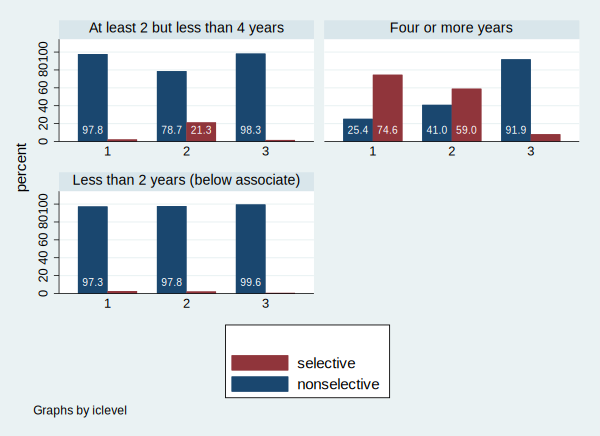

In [63]:
bysort iclevel: tab selective control, column nofreq
xi i.selective, noomit
graph bar _Iselective_0 _Iselective_1 ///
, label percentages legend(position(3) cols(1) order(6 5 4 3 2 1)) blabel(bar, format(%9.1f) position(base) color(white)) ///
yvaroptions(relabel(1 "nonselective" 2 "selective")) over(control) by(iclevel)